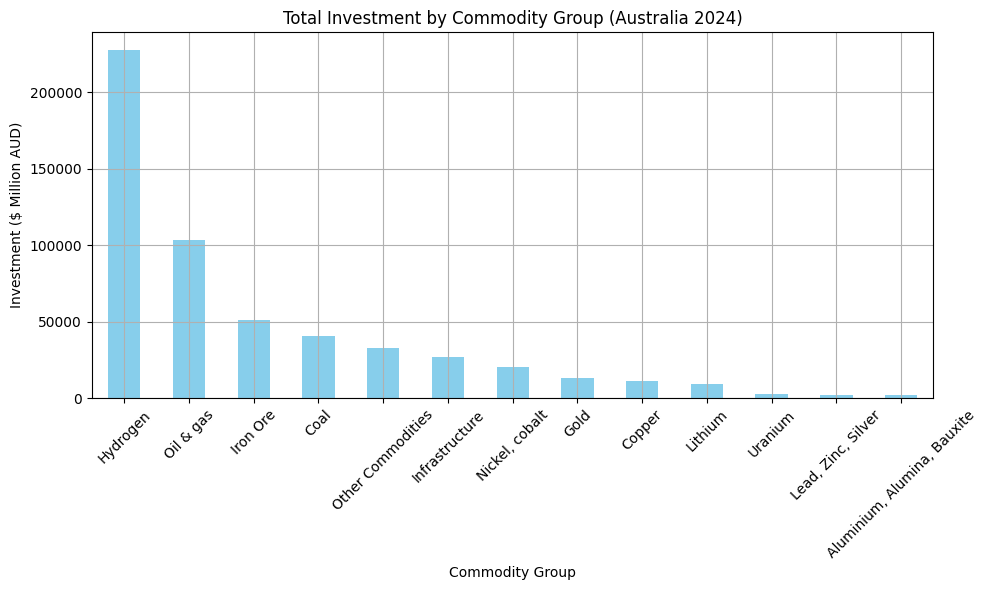

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Use the working local or Google Drive path
file_path = "/content/drive/MyDrive/Colab Notebooks/resources-and-energy-major-projects-2024-data.xlsx"

# ✅ Skip 6 rows to get the clean table
df = pd.read_excel(file_path, sheet_name="Consolidated", skiprows=6)

# ✅ Rename columns
df.columns = [
    'Commodity Group', 'Project', 'Company', 'State', 'Latitude', 'Longitude',
    'Type', 'Status', 'Annual Estimated New Capacity', 'Capacity Unit',
    'Resource', 'Construction Employment Estimate', 'Operating Employment Estimate',
    'Cost Estimate $Am', 'Estimated Start Commercial Operation', 'Critical Mineral'
]

# ✅ Clean and convert cost column
df = df.dropna(subset=["Cost Estimate $Am"])
df["Cost Estimate $Am"] = pd.to_numeric(df["Cost Estimate $Am"], errors="coerce")

# ✅ Plot total investment
investment_by_group = df.groupby("Commodity Group")["Cost Estimate $Am"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
investment_by_group.plot(kind="bar", color="skyblue")
plt.title("Total Investment by Commodity Group (Australia 2024)")
plt.xlabel("Commodity Group")
plt.ylabel("Investment ($ Million AUD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-2-6f85fcd4ec49>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Estimated Start Commercial Operation"] = pd.to_datetime(df["Estimated Start Commercial Operation"], errors="coerce")
<ipython-input-2-6f85fcd4ec49>:39: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


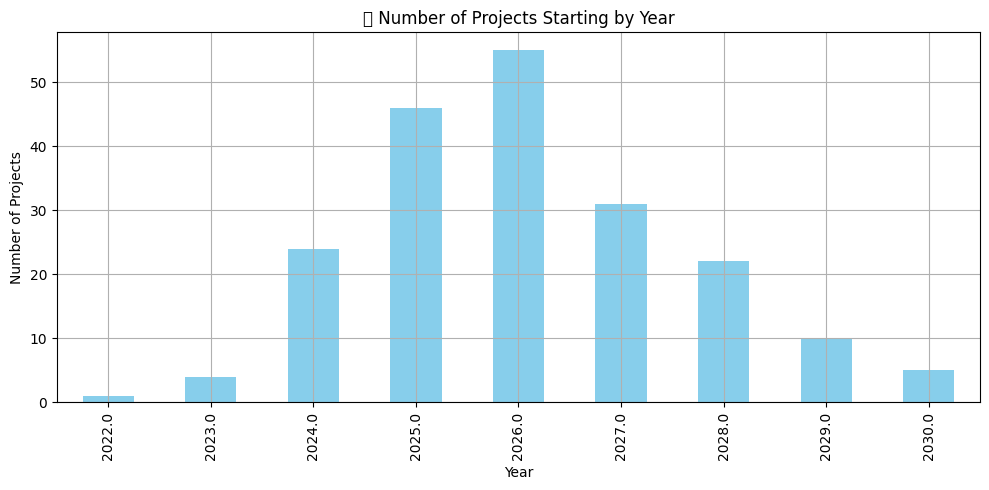

<ipython-input-2-6f85fcd4ec49>:49: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


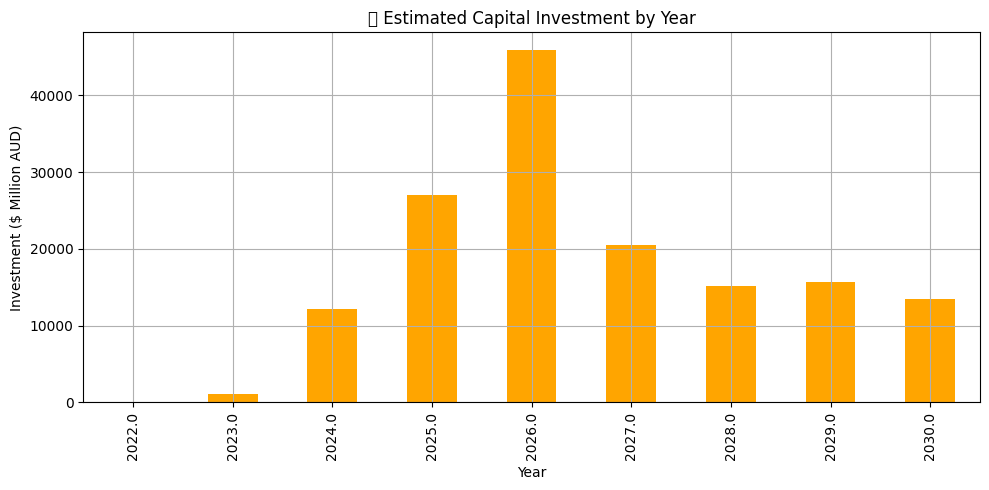

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset again (reuse your path if needed)
file_path = "/content/drive/MyDrive/Colab Notebooks/resources-and-energy-major-projects-2024-data.xlsx"
df = pd.read_excel(file_path, sheet_name="Consolidated", skiprows=6)

# Rename columns again
df.columns = [
    'Commodity Group', 'Project', 'Company', 'State', 'Latitude', 'Longitude',
    'Type', 'Status', 'Annual Estimated New Capacity', 'Capacity Unit',
    'Resource', 'Construction Employment Estimate', 'Operating Employment Estimate',
    'Cost Estimate $Am', 'Estimated Start Commercial Operation', 'Critical Mineral'
]

# Clean cost data
df = df.dropna(subset=["Cost Estimate $Am"])
df["Cost Estimate $Am"] = pd.to_numeric(df["Cost Estimate $Am"], errors="coerce")

# ✅ Clean and convert date column
df["Estimated Start Commercial Operation"] = pd.to_datetime(df["Estimated Start Commercial Operation"], errors="coerce")

# ✅ Extract year
df["Start Year"] = df["Estimated Start Commercial Operation"].dt.year

# ✅ Group by year
projects_per_year = df.groupby("Start Year").agg({
    "Project": "count",
    "Cost Estimate $Am": "sum"
}).dropna().sort_index()

# ✅ Plot number of projects by year
plt.figure(figsize=(10, 5))
projects_per_year["Project"].plot(kind="bar", color="skyblue")
plt.title("📅 Number of Projects Starting by Year")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Plot investment by year
plt.figure(figsize=(10, 5))
projects_per_year["Cost Estimate $Am"].plot(kind="bar", color="orange")
plt.title("💰 Estimated Capital Investment by Year")
plt.xlabel("Year")
plt.ylabel("Investment ($ Million AUD)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import FileLink

# ✅ Step 1: Load the Excel data
file_path = "/content/drive/MyDrive/Colab Notebooks/resources-and-energy-major-projects-2024-data.xlsx"
df = pd.read_excel(file_path, sheet_name="Consolidated", skiprows=6)

# ✅ Step 2: Rename columns to readable names
df.columns = [
    'Commodity Group', 'Project', 'Company', 'State', 'Latitude', 'Longitude',
    'Type', 'Status', 'Annual Estimated New Capacity', 'Capacity Unit',
    'Resource', 'Construction Employment Estimate', 'Operating Employment Estimate',
    'Cost Estimate $Am', 'Estimated Start Commercial Operation', 'Critical Mineral'
]

# ✅ Step 3: Clean up numeric and date columns
df["Cost Estimate $Am"] = pd.to_numeric(df["Cost Estimate $Am"], errors="coerce")
df["Estimated Start Commercial Operation"] = pd.to_datetime(
    df["Estimated Start Commercial Operation"], errors="coerce"
)
df["Start Year"] = df["Estimated Start Commercial Operation"].dt.year

# ✅ Step 4: Filter critical mineral projects with location & cost
critical_df = df[
    (df["Critical Mineral"] == "Yes") &
    df["Latitude"].notna() &
    df["Longitude"].notna() &
    df["Cost Estimate $Am"].notna()
]

# ✅ Step 5: Create interactive map with markers
m = folium.Map(location=[-25.27, 133.77], zoom_start=4)
marker_cluster = MarkerCluster().add_to(m)

for _, row in critical_df.iterrows():
    popup = f"""
    <b>Project:</b> {row['Project']}<br>
    <b>Company:</b> {row['Company']}<br>
    <b>State:</b> {row['State']}<br>
    <b>Commodity:</b> {row['Commodity Group']}<br>
    <b>Investment:</b> ${row['Cost Estimate $Am']:,.0f} M<br>
    <b>Start Year:</b> {row['Start Year']}
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=popup,
        icon=folium.Icon(color="green", icon="leaf")
    ).add_to(marker_cluster)

# ✅ Step 6: Save and display download link
map_path = "critical_minerals_map.html"
m.save(map_path)

# ✅ Show link (Colab compatible)
from google.colab import files
files.download("critical_minerals_map.html")



<ipython-input-3-a0f638f6ebbd>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Estimated Start Commercial Operation"] = pd.to_datetime(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
df["Estimated Start Commercial Operation"] = pd.to_datetime(
    df["Estimated Start Commercial Operation"],
    format="%d/%m/%Y",   # 👈 Or change to "%Y-%m-%d" if needed
    errors="coerce"
)


In [5]:
df["Estimated Start Commercial Operation"].dropna().head(10)


,Estimated Start Commercial Operation
1,2026-01-01
2,2024-01-01
4,2025-01-01
7,2030-01-01
8,2029-01-01
12,2026-01-01
16,2024-01-01
17,2025-01-01
21,2028-01-01
28,2022-01-01


In [9]:
!pip install prophet --upgrade --quiet


In [13]:
# ✅ Rename actual columns to standard names
df = df.rename(columns={
    "Cost Estimate $Am": "Cost",
    "Construction Employment Estimate": "ConstructionJobs",
    "Operating Employment Estimate": "OperatingJobs",
    "Estimated Start Commercial Operation": "StartDate"
})

# ✅ Use correct columns for the pipeline
df_clean = df[["Project", "State", "Cost", "ConstructionJobs", "OperatingJobs", "StartDate"]].copy()

# ✅ Convert data types
df_clean["Cost"] = pd.to_numeric(df_clean["Cost"], errors="coerce")
df_clean["ConstructionJobs"] = pd.to_numeric(df_clean["ConstructionJobs"], errors="coerce")
df_clean["OperatingJobs"] = pd.to_numeric(df_clean["OperatingJobs"], errors="coerce")
df_clean["StartDate"] = pd.to_datetime(df_clean["StartDate"], errors="coerce")

# ✅ Drop missing values
df_clean = df_clean.dropna()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/1g0tm4mm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/5_hx4dns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97389', 'data', 'file=/tmp/tmp68tzdj6c/1g0tm4mm.json', 'init=/tmp/tmp68tzdj6c/5_hx4dns.json', 'output', 'file=/tmp/tmp68tzdj6c/prophet_model6zxl1i8a/prophet_model-20250603062702.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:27:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:27:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

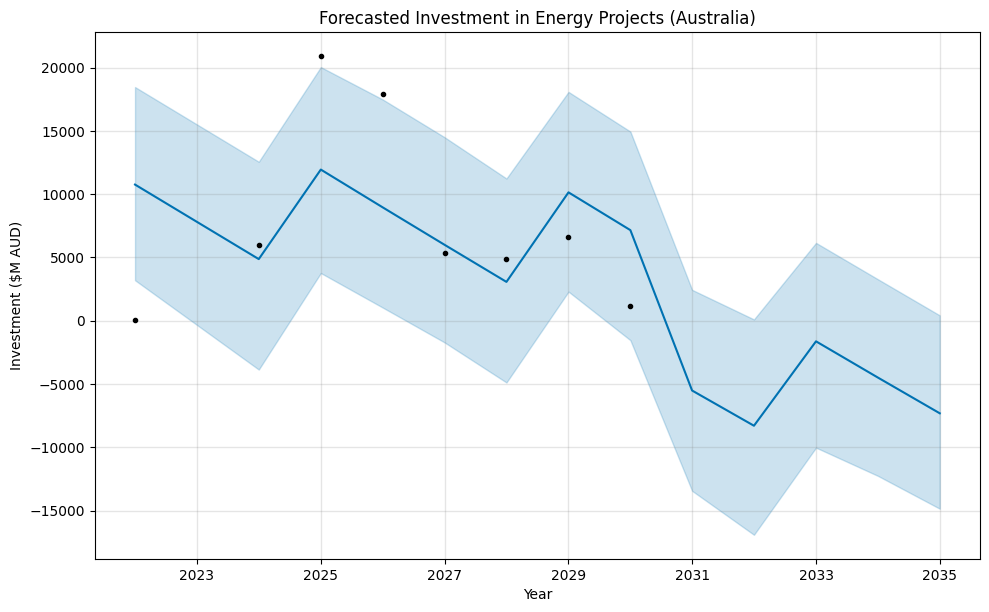

,ds,yhat,yhat_lower,yhat_upper
3,2026-01-01,8951.484797,1034.984380,17476.457421
4,2027-01-01,5992.711441,-1719.633882,14492.881589
5,2028-01-01,3063.326015,-4884.699930,11232.717315
6,2029-01-01,10136.559183,2292.330599,18073.769499
7,2030-01-01,7151.448174,-1543.589970,14940.392688
8,2030-12-31,-5518.840974,-13443.286464,2435.631151
9,2031-12-31,-8301.323055,-16916.395969,99.441760
10,2032-12-31,-1633.712188,-10031.107190,6145.670847
11,2033-12-31,-4495.392643,-12260.740730,3273.673104
12,2034-12-31,-7318.877607,-14856.737748,418.819983


In [14]:
from prophet import Prophet
import matplotlib.pyplot as plt

# ✅ Prepare yearly investment data
investment_by_year = (
    df_clean.groupby(df_clean["StartDate"].dt.year)["Cost"]
    .sum()
    .reset_index()
    .rename(columns={"StartDate": "ds", "Cost": "y"})
)
investment_by_year["ds"] = pd.to_datetime(investment_by_year["ds"], format="%Y")

# ✅ Train Prophet model
model = Prophet()
model.fit(investment_by_year)

# ✅ Make future predictions (5 years ahead)
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# ✅ Plot forecast
fig1 = model.plot(forecast)
plt.title("Forecasted Investment in Energy Projects (Australia)")
plt.xlabel("Year")
plt.ylabel("Investment ($M AUD)")
plt.grid(True)
plt.show()

# ✅ Show forecast table
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


In [15]:
import pandas as pd

# ✅ Mount your Google Drive first (if not already)
from google.colab import drive
drive.mount('/content/drive')

# ✅ Load your Excel file
file_path = "/content/drive/MyDrive/Colab Notebooks/resources-and-energy-major-projects-2024-data.xlsx"
df = pd.read_excel(file_path, sheet_name="Consolidated", skiprows=6)

# ✅ Clean and rename columns
df.columns = [
    'Commodity Group', 'Project', 'Company', 'State', 'Latitude', 'Longitude',
    'Type', 'Status', 'Annual Estimated New Capacity', 'Capacity Unit',
    'Resource', 'Construction Employment Estimate', 'Operating Employment Estimate',
    'Cost Estimate $Am', 'Estimated Start Commercial Operation', 'Critical Mineral'
]

# ✅ Format columns
df["Cost Estimate $Am"] = pd.to_numeric(df["Cost Estimate $Am"], errors="coerce")
df["Estimated Start Commercial Operation"] = pd.to_datetime(df["Estimated Start Commercial Operation"], errors="coerce")

# ✅ Group by year of operation
investment_by_year = (
    df.dropna(subset=["Estimated Start Commercial Operation", "Cost Estimate $Am"])
    .groupby(df["Estimated Start Commercial Operation"].dt.year)["Cost Estimate $Am"]
    .sum()
    .reset_index()
)

# ✅ Rename for Prophet format
investment_by_year.columns = ["ds", "y"]
investment_by_year = investment_by_year[investment_by_year["ds"].notnull()]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-2a37aa5f4ecf>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Estimated Start Commercial Operation"] = pd.to_datetime(df["Estimated Start Commercial Operation"], errors="coerce")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/vd85tnkz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/640gasm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62941', 'data', 'file=/tmp/tmp68tzdj6c/vd85tnkz.json', 'init=/tmp/tmp68tzdj6c/640gasm0.json', 'output', 'file=/tmp/tmp68tzdj6c/prophet_modeldtg3q6hw/prophet_model-20250603062725.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:27:25 - cmdstanpy - INFO - Chain [1] start processing
IN

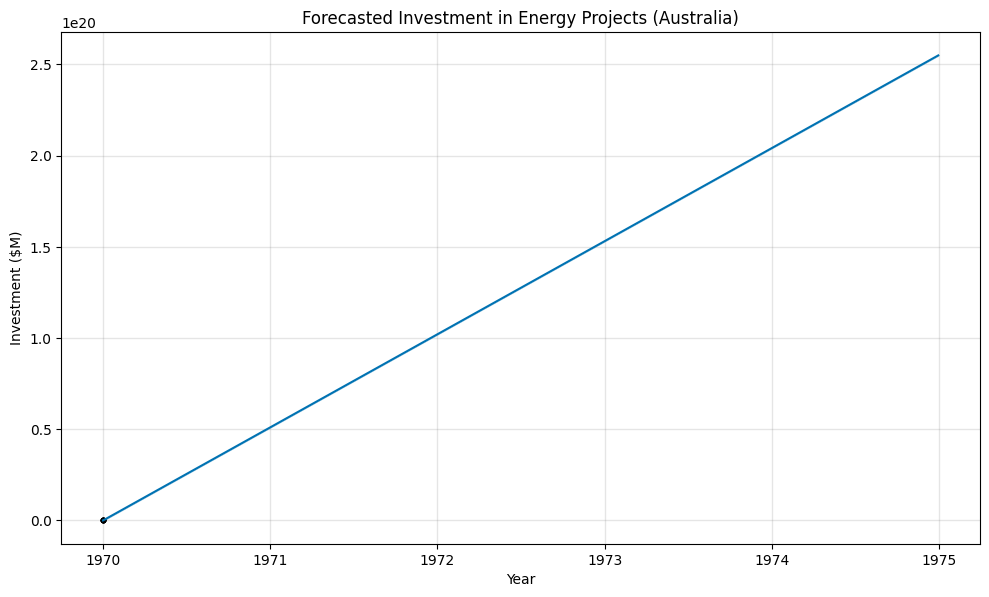

In [16]:
from prophet import Prophet
import matplotlib.pyplot as plt

# ✅ Train model
model = Prophet()
model.fit(investment_by_year)

# ✅ Predict 5 years into future
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# ✅ Plot forecast
fig = model.plot(forecast)
plt.title("Forecasted Investment in Energy Projects (Australia)")
plt.xlabel("Year")
plt.ylabel("Investment ($M)")
plt.grid(True)
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/x5rk8xpw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/i_92b663.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42408', 'data', 'file=/tmp/tmp68tzdj6c/x5rk8xpw.json', 'init=/tmp/tmp68tzdj6c/i_92b663.json', 'output', 'file=/tmp/tmp68tzdj6c/prophet_modelhfmp6ow8/prophet_model-20250603062729.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:27:29 - cmdstanpy - INFO - Chain [1] start processing
IN

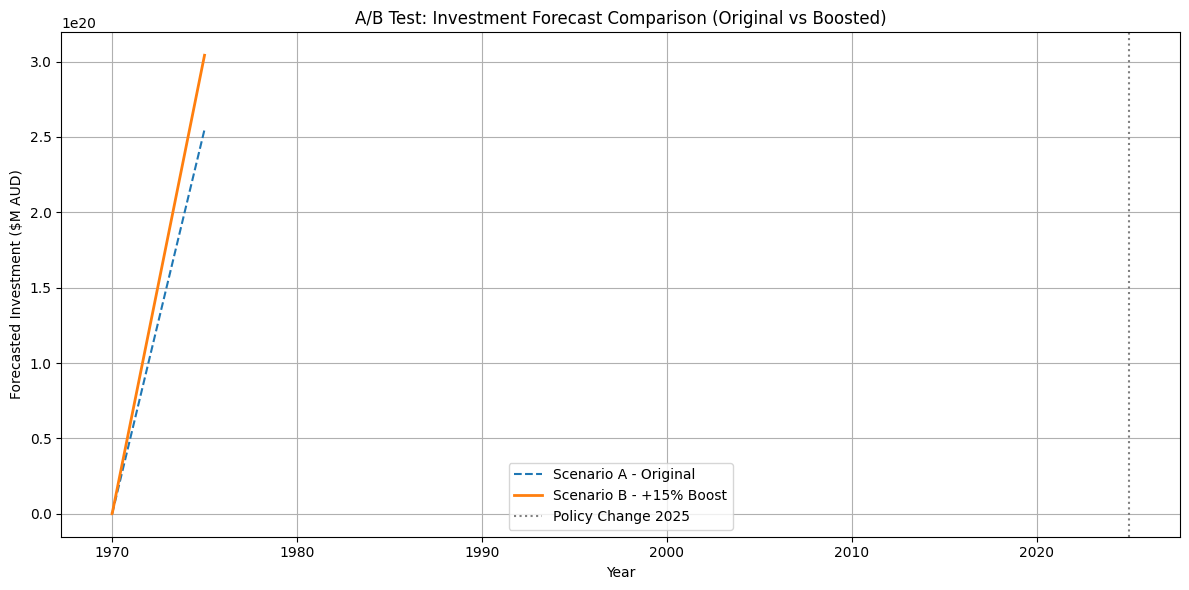

In [17]:
from prophet import Prophet
import matplotlib.pyplot as plt

# ✅ Base model on original data
model_a = Prophet()
model_a.fit(investment_by_year)

# ✅ Create forecast dataframe
future_a = model_a.make_future_dataframe(periods=5, freq='Y')
forecast_a = model_a.predict(future_a)

# ✅ Scenario B: Boosted investment after 2025 (+15%)
# Make a copy of the original data
investment_by_year_b = investment_by_year.copy()

# Apply 15% increase to investments from 2025 onward
investment_by_year_b.loc[investment_by_year_b["ds"] >= 2025, "y"] *= 1.15

# Train model B
model_b = Prophet()
model_b.fit(investment_by_year_b)

# Forecast with scenario B
future_b = model_b.make_future_dataframe(periods=5, freq='Y')
forecast_b = model_b.predict(future_b)

# ✅ Plot both scenarios
plt.figure(figsize=(12, 6))
plt.plot(forecast_a["ds"], forecast_a["yhat"], label="Scenario A - Original", linestyle="--")
plt.plot(forecast_b["ds"], forecast_b["yhat"], label="Scenario B - +15% Boost", linewidth=2)

plt.axvline(x=pd.to_datetime("2025-01-01"), color='gray', linestyle=':', label='Policy Change 2025')
plt.title("A/B Test: Investment Forecast Comparison (Original vs Boosted)")
plt.xlabel("Year")
plt.ylabel("Forecasted Investment ($M AUD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/of1t9_wy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/tm87l_5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59366', 'data', 'file=/tmp/tmp68tzdj6c/of1t9_wy.json', 'init=/tmp/tmp68tzdj6c/tm87l_5k.json', 'output', 'file=/tmp/tmp68tzdj6c/prophet_modelx2mg2p5g/prophet_model-20250603062733.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:27:33 - cmdstanpy - INFO - Chain [1] start processing
IN

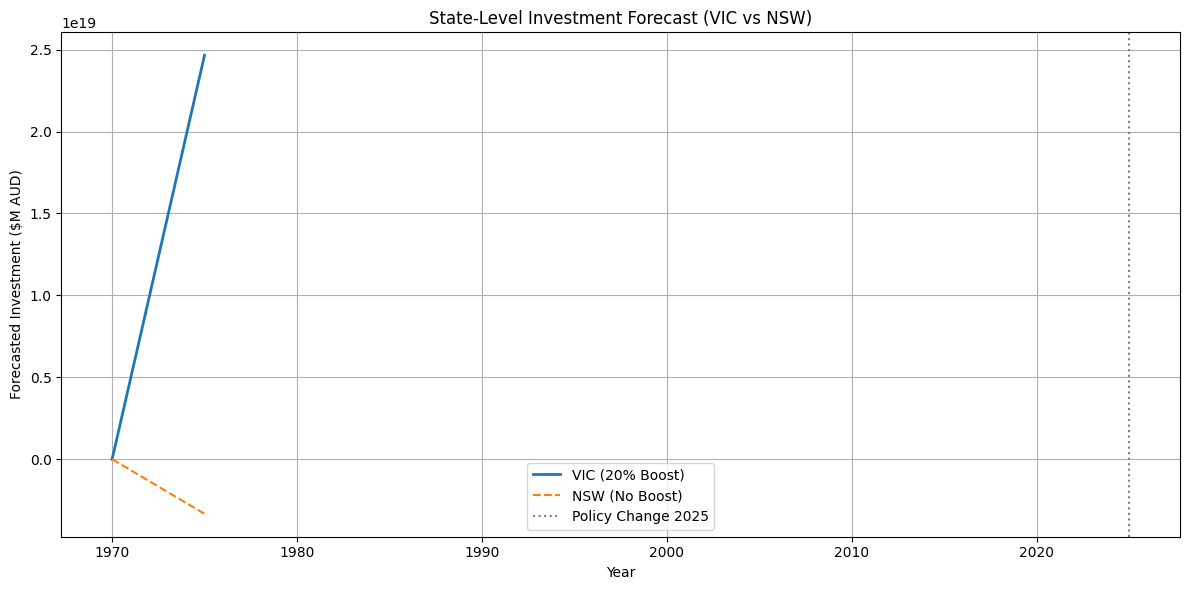

In [18]:
# ✅ Filter VIC and NSW only
df_vic_nsw = df[df["State"].isin(["VIC", "NSW"])].copy()

# ✅ Clean up
df_vic_nsw["Cost Estimate $Am"] = pd.to_numeric(df_vic_nsw["Cost Estimate $Am"], errors="coerce")
df_vic_nsw["Estimated Start Commercial Operation"] = pd.to_datetime(df_vic_nsw["Estimated Start Commercial Operation"], errors="coerce")

# ✅ Group by year and state
state_year_group = (
    df_vic_nsw.dropna(subset=["Estimated Start Commercial Operation", "Cost Estimate $Am"])
    .groupby([df_vic_nsw["Estimated Start Commercial Operation"].dt.year, "State"])["Cost Estimate $Am"]
    .sum()
    .reset_index()
    .rename(columns={"Estimated Start Commercial Operation": "Year", "Cost Estimate $Am": "Investment"})
)

# Separate VIC and NSW
vic = state_year_group[state_year_group["State"] == "VIC"][["Year", "Investment"]].rename(columns={"Year": "ds", "Investment": "y"})
nsw = state_year_group[state_year_group["State"] == "NSW"][["Year", "Investment"]].rename(columns={"Year": "ds", "Investment": "y"})

# Apply +20% boost to VIC from 2025 onward
vic_boost = vic.copy()
vic_boost.loc[vic_boost["ds"] >= 2025, "y"] *= 1.2

# Train Prophet models
model_vic = Prophet()
model_nsw = Prophet()

model_vic.fit(vic_boost)
model_nsw.fit(nsw)

# Forecast
future_vic = model_vic.make_future_dataframe(periods=5, freq='Y')
future_nsw = model_nsw.make_future_dataframe(periods=5, freq='Y')

forecast_vic = model_vic.predict(future_vic)
forecast_nsw = model_nsw.predict(future_nsw)

# ✅ Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(forecast_vic["ds"], forecast_vic["yhat"], label="VIC (20% Boost)", linewidth=2)
plt.plot(forecast_nsw["ds"], forecast_nsw["yhat"], label="NSW (No Boost)", linestyle="--")

plt.axvline(x=pd.to_datetime("2025-01-01"), color='gray', linestyle=':', label='Policy Change 2025')
plt.title("State-Level Investment Forecast (VIC vs NSW)")
plt.xlabel("Year")
plt.ylabel("Forecasted Investment ($M AUD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


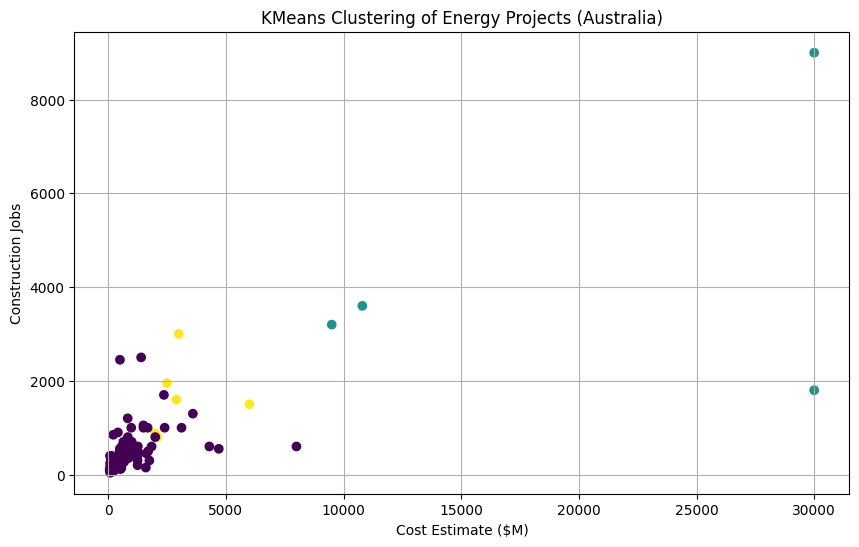

,Project,State,Cost,Cluster
0,Aurukun Bauxite projects,QLD,538.0,0
2,HPA First Project - Stage 2,QLD,553.0,0
5,Alpha (mine and rail),QLD,10800.0,1
7,Baralaba South,QLD,157.0,0
8,Blackwater South,QLD,1000.0,2


In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ✅ Select and clean relevant columns
df_cluster = df[["Project", "State", "Cost Estimate $Am", "Construction Employment Estimate", "Operating Employment Estimate"]].copy()
df_cluster = df_cluster.dropna()

# ✅ Rename for easier use
df_cluster.columns = ["Project", "State", "Cost", "ConstructionJobs", "OperatingJobs"]

# ✅ Feature matrix
X = df_cluster[["Cost", "ConstructionJobs", "OperatingJobs"]]

# ✅ Standardize features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["Cluster"] = kmeans.fit_predict(X_scaled)

# ✅ Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster["Cost"], df_cluster["ConstructionJobs"], c=df_cluster["Cluster"], cmap='viridis')
plt.xlabel("Cost Estimate ($M)")
plt.ylabel("Construction Jobs")
plt.title("KMeans Clustering of Energy Projects (Australia)")
plt.grid(True)
plt.show()

# ✅ Preview clustered data
df_cluster[["Project", "State", "Cost", "Cluster"]].head()


In [20]:
!pip install folium --quiet


In [21]:
import folium
from folium.plugins import MarkerCluster

# ✅ Add Latitude and Longitude to clustered dataset
df_cluster_geo = df[["Project", "State", "Cost Estimate $Am", "Construction Employment Estimate", "Operating Employment Estimate", "Latitude", "Longitude"]].copy()
df_cluster_geo = df_cluster_geo.dropna()

# Rename to match clustering
df_cluster_geo.columns = ["Project", "State", "Cost", "ConstructionJobs", "OperatingJobs", "Latitude", "Longitude"]

# Use same scaling and clustering
X_geo = df_cluster_geo[["Cost", "ConstructionJobs", "OperatingJobs"]]
X_geo_scaled = scaler.transform(X_geo)  # Use same scaler as before
df_cluster_geo["Cluster"] = kmeans.predict(X_geo_scaled)

# ✅ Create base map of Australia
map_clusters = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

# Marker cluster group
marker_cluster = MarkerCluster().add_to(map_clusters)

# Add points
for _, row in df_cluster_geo.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['Project']} ({row['State']})<br>Cluster: {row['Cluster']}<br>Cost: ${row['Cost']}M",
        icon=folium.Icon(color=['red', 'green', 'blue'][row["Cluster"]])
    ).add_to(marker_cluster)

# ✅ Save to file
map_clusters.save("clustered_projects_map.html")
map_clusters


In [22]:
!pip install prophet --quiet


In [23]:
!pip install --quiet prophet pystan


<ipython-input-28-aeca4e456e76>:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean["StartDate"] = pd.to_datetime(df_clean["StartDate"], errors="coerce")
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/0vpza8iu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/pycd37sx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33201', 'data', 'file=/tmp/tmp68tzdj6c/0vpza8iu.json', 'init=/tmp/tmp68tzdj6c/pycd37sx.json', 'ou

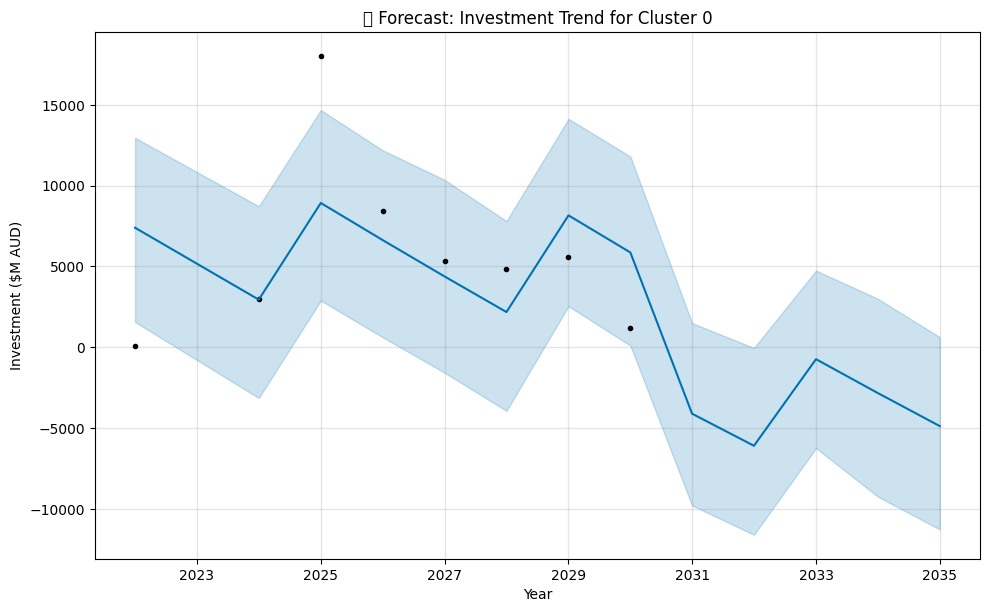

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/ixolhc0u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68tzdj6c/8p211az1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18575', 'data', 'file=/tmp/tmp68tzdj6c/ixolhc0u.json', 'init=/tmp/tmp68tzdj6c/8p211az1.json', 'output', 'file=/tmp/tmp68tzdj6c/prophet_model49ktfk2a/prophet_model-20250603063414.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:34:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


⚠️ Not enough data to forecast for Cluster 1


06:34:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


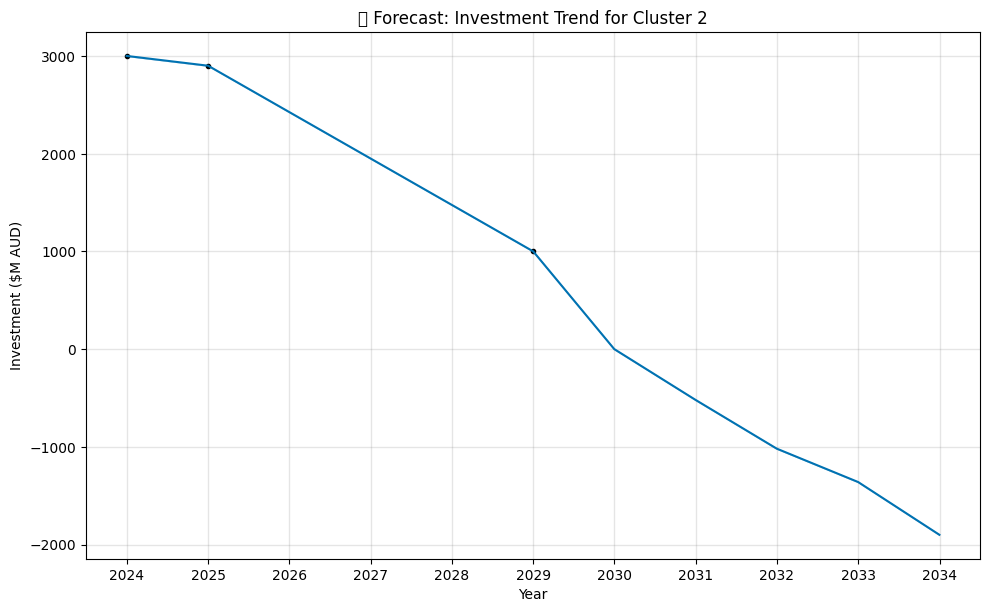

In [28]:
# Hybrid ML Pipeline: KMeans Clustering + Prophet Time Series Forecasting
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
import matplotlib.pyplot as plt

# ✅ 1. Load the Excel file (adjust your Google Drive path if needed)
file_path = "/content/drive/MyDrive/Colab Notebooks/resources-and-energy-major-projects-2024-data.xlsx"
df = pd.read_excel(file_path, sheet_name="Consolidated", skiprows=6)

# ✅ 2. Rename and clean relevant columns
# ✅ Rename columns to standard names
df = df.rename(columns={
    "Cost Estimate $Am": "Cost",
    "Construction Employment Estimate": "ConstructionJobs",
    "Operating Employment Estimate": "OperatingJobs",
    "Estimated Start Commercial Operation": "StartDate"
})

# ✅ Now extract the relevant columns
df_clean = df[["Project", "State", "Cost", "ConstructionJobs", "OperatingJobs", "StartDate"]].copy()

# ✅ Convert columns to correct types
df_clean["Cost"] = pd.to_numeric(df_clean["Cost"], errors="coerce")
df_clean["ConstructionJobs"] = pd.to_numeric(df_clean["ConstructionJobs"], errors="coerce")
df_clean["OperatingJobs"] = pd.to_numeric(df_clean["OperatingJobs"], errors="coerce")
df_clean["StartDate"] = pd.to_datetime(df_clean["StartDate"], errors="coerce")

# ✅ Drop any rows with missing values
df_clean = df_clean.dropna()

# 🔍 Preview
df_clean.head()



# ✅ 3. Apply KMeans clustering
features = ["Cost", "ConstructionJobs", "OperatingJobs"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled)

# ✅ 4. Forecast investment trend for each cluster using Prophet
for cluster_id in sorted(df_clean["Cluster"].unique()):
    df_cluster = df_clean[df_clean["Cluster"] == cluster_id]

    # Group by year for forecasting
    ts_data = (
        df_cluster.groupby(df_cluster["StartDate"].dt.year)["Cost"]
        .sum()
        .reset_index()
        .rename(columns={"StartDate": "ds", "Cost": "y"})
    )
    ts_data["ds"] = pd.to_datetime(ts_data["ds"], format="%Y")

    if len(ts_data) < 2:
        print(f"⚠️ Not enough data to forecast for Cluster {cluster_id}")
        continue

    model = Prophet()
    model.fit(ts_data)

    future = model.make_future_dataframe(periods=5, freq="Y")
    forecast = model.predict(future)

    # Plot
    fig = model.plot(forecast)
    plt.title(f"📊 Forecast: Investment Trend for Cluster {cluster_id}")
    plt.xlabel("Year")
    plt.ylabel("Investment ($M AUD)")
    plt.grid(True)
    plt.show()
